In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv
hai_csv = pd.read_csv('csvs/Healthcare_Associated_Infections_-_Hospital.csv')

In [3]:
#convert csv into dataframe
hai_df = pd.DataFrame(hai_csv)

In [4]:
#Drop unnecessary data
hai_clean_df = hai_df.drop(['Provider ID', 
             'Phone Number',
             'Measure ID',
             'Footnote',
             'Measure Start Date',
             'Measure End Date'],axis = 1)

In [5]:
#Read in csv of hospital list with hospital demographics
hospitals_csv = pd.read_csv('csvs/hospitals_db.csv')

In [6]:
#Read in medicare hospital list to see if it has the beds
med_csv = pd.read_csv('resources/medicare_hospital_list.csv')

In [7]:
#create df of medicare hospitals
med_df = pd.DataFrame(med_csv)

In [8]:
med_df

X          Y  OBJECTID         ID  \
0    -117.865776  33.780810      3001   70892868   
1    -117.695977  34.078758      3002   72091763   
2    -118.130904  33.934352      3003   72390241   
3    -118.306274  33.739018      3004   72690732   
4    -118.359722  33.839348      3005   72790503   
5    -120.390796  37.979667      3006   72895370   
6    -118.215980  34.204889      3007   73491208   
7    -117.844195  33.851988      3008   73892806   
8    -119.723809  34.429467      3009   74193102   
9     -84.353952  33.906082      3010   82830342   
10    -84.282910  33.791089      3011   83030033   
11    -88.127693  44.865335      3012  150654154   
12    -90.708635  43.133184      3013  151753805   
13    -92.363651  30.226009      3014  160370526   
14    -92.106796  32.450889      3015  164671202   
15    -91.038050  30.385655      3016  165270815   
16    -91.114400  43.022206      3017   17853821   
17    -87.967626  43.187309      3018   17953223   
18    -89.296703  43.153039      3019   18053718   
19   -117.264094  34.050131      3020   58592354   
20   -118.243801  33.922637      3021   58690059   
21   -117.672631  35.640900      3022   58893555   
22   -122.751872  38.494959      3023   58995403   
23   -105.009361  40.521123      3024   12480528   
24   -105.010013  39.557333      3025   12580129   
25   -104.991141  39.956596      3026   12780023   
26    -72.836239  41.462706      3027    3006492   
27    -90.674779  42.492506      3028   95152001   
28    -91.054458  41.433408      3029   93552761   
29    -72.856761  41.472885      3030    3380649   
...          ...        ...       ...        ...   
7466  -74.451690  40.494825      4971  108108901   
7467  -74.234373  40.851759      4972  108207009   
7468  -74.079725  40.282835      4973  108307724   
7469  -75.149466  39.843856      4974  108408096   
7470  -74.880652  40.046657      4975  108508046   
7471  -74.218544  40.073300      4976  108608701   
7472  -74.595369  40.568296      4977  108708876   
7473  -74.218544  40.073300      4978  108808701   
7474  -74.434370  39.358119      4979  108908401   
7475  -74.637106  39.967500      4980  109008068   
7476  -74.015021  40.985529      4981  109107675   
7477  -74.214918  40.658620      4982  109207207   
7478  -74.034038  40.741129      4983  109307030   
7479  -74.685196  40.467623      4984  109408502   
7480  -74.015021  40.985529      4985  109507675   
7481  -75.052593  39.445162      4986  109608360   
7482  -74.060006  40.778876      4987  109707094   
7483  -74.350117  40.556595      4988  109908818   
7484  -74.137748  40.859312      4989  110007055   
7485  -74.204039  40.811427      4990  110207042   
7486  -74.802923  40.291987      4991  110308534   
7487  -74.592513  39.313967      4992  110408244   
7488  -95.124672  43.417746      4993     351360   
7489  -74.624164  40.340362      4994  110508536   
7490  -81.223012  41.535709      4995  123244024   
7491  -84.063053  39.771044      4996   17645431   
7492  -83.927741  39.700125      4997    1945385   
7493 -105.210873  35.623444      4998    4987701   
7494 -104.257930  32.442539      4999    2588220   
7495 -106.639071  35.084911      5000    4587102   

                                                   NAME  \
0                  CHILDREN'S HOSPITAL OF ORANGE COUNTY   
1                     MONTCLAIR HOSPITAL MEDICAL CENTER   
2                                 PIH HOSPITAL - DOWNEY   
3     PROVIDENCE LITTLE COMPANY OF MARY SUBACUTE CAR...   
4     PROVIDENCE LITTLE COMPANY OF MARY TRANSITIONAL...   
5     SONORA REGIONAL MEDICAL CENTER D/P SNF (UNIT 6...   
6                            USC VERDUGO HILLS HOSPITAL   
7             KAISER FND HOSP - ORANGE COUNTY - ANAHEIM   
8                        SANTA BARBARA COTTAGE HOSPITAL   
9      CHILDRENS HEALTHCARE OF ATLANTA AT SCOTTISH RITE   
10                                DEKALB MEDICAL CENTER   
11                      HSHS ST CLARE MEMORIAL HOSPITAL   
12         GUNDERSEN BO

In [9]:
#Create DF of hospital list
hospitals_df = pd.DataFrame(hospitals_csv)

In [10]:
#Rename columns to match with the hospital column on which to merge DFs
hai_clean_df = hai_clean_df.rename(columns = {'Hospital Name': 'NAME',
                                'Address':'ADDRESS',
                                'City':'CITY',
                                'State':'STATE',
                                'ZIP Code':'ZIP',
                                'County Name':'COUNTY',
                                'Measure Name':'MEASURE',
                                'Compared to National':'COMPARED TO NATIONAL',
                                'Score':'SCORE',
                                'Location':'Location'})

In [11]:
#Drop unnecessary data from the hospital DF
hospitals_clean_df = med_df.drop(['X','Y','OBJECTID','ID','ADDRESS2','WEBSITE','STATE_ID','ALT_NAME','ST_FIPS','TTL_STAFF','TRAUMA','HELIPAD','DATECREATE'], axis = 1)

In [12]:
#Merging the list of hospitals with this list of infections
hai_hospital_merge_df =  pd.merge(hai_clean_df, hospitals_clean_df, how='left', on='NAME')

In [13]:
hai_hospital_merge_df

NAME  \
0                                  TOURO INFIRMARY   
1             CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2                        SLIDELL MEMORIAL HOSPITAL   
3       IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4                     CHRISTUS ST PATRICK HOSPITAL   
5                JENNINGS AMERICAN LEGION HOSPITAL   
6                        SLIDELL MEMORIAL HOSPITAL   
7                    WEST JEFFERSON MEDICAL CENTER   
8                          ACADIA GENERAL HOSPITAL   
9                       ABBEVILLE GENERAL HOSPITAL   
10                   WEST JEFFERSON MEDICAL CENTER   
11                   WEST JEFFERSON MEDICAL CENTER   
12                      ABBEVILLE GENERAL HOSPITAL   
13      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
14      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
15                  LAKE CHARLES MEMORIAL HOSPITAL   
16                                 TOURO INFIRMARY   
17                   MARSHALL MEDICAL CENTER SOUTH   
18                         ACADIA GENERAL HOSPITAL   
19                          OCHSNER MEDICAL CENTER   
20                          OCHSNER MEDICAL CENTER   
21                    BEAUREGARD MEMORIAL HOSPITAL   
22                      ST TAMMANY PARISH HOSPITAL   
23                    CHRISTUS ST PATRICK HOSPITAL   
24                  LAKE CHARLES MEMORIAL HOSPITAL   
25                                 TOURO INFIRMARY   
26                      ST TAMMANY PARISH HOSPITAL   
27                      ABBEVILLE GENERAL HOSPITAL   
28                      ST TAMMANY PARISH HOSPITAL   
29                      ST TAMMANY PARISH HOSPITAL   
...                                            ...   
197610                     WASHAKIE MEDICAL CENTER   
197611               NIOBRARA HEALTH & LIFE CENTER   
197612             PLATTE COUNTY MEMORIAL HOSPITAL   
197613                  STAR VALLEY MEDICAL CENTER   
197614               NIOBRARA HEALTH & LIFE CENTER   
197615            JOHNSON COUNTY HEALTHCARE CENTER   
197616            JOHNSON COUNTY HEALTHCARE CENTER   
197617                       CROOK COUNTY HOSPITAL   
197618                          COMMUNITY HOSPITAL   
197619                          COMMUNITY HOSPITAL   
197620                          COMMUNITY HOSPITAL   
197621                          COMMUNITY HOSPITAL   
197622                          COMMUNITY HOSPITAL   
197623                          COMMUNITY HOSPITAL   
197624                          COMMUNITY HOSPITAL   
197625               NIOBRARA HEALTH & LIFE CENTER   
197626          SOUTH LINCOLN MEDICAL CENTER - CAH   
197627                  STAR VALLEY MEDICAL CENTER   
197628               NIOBRARA HEALTH & LIFE CENTER   
197629             PLATTE COUNTY MEMORIAL HOSPITAL   
197630               NIOBRARA HEALTH & LIFE CENTER   
197631        HOT SPRINGS COUNTY MEMORIAL HOSPITAL   
197632                      POWELL VALLEY HOSPITAL   
197633            NORTH BIG HORN HOSPITAL DISTRICT   
197634            JOHNSON COUNTY HEALTHCARE CENTER   
197635            NORTH BIG HORN HOSPITAL DISTRICT   
197636            JOHNSON COUNTY HEALTHCARE CENTER   
197637             PLATTE COUNTY MEMORIAL HOSPITAL   
197638          MEMORIAL HOSPITAL OF CARBON COUNTY   
197639                 WEST PARK HOSPITAL DISTRICT   

                                 ADDRESS_x        CITY_x STATE_x  ZIP_x  \
0                      1401 FOUCHER STREET   NEW ORLEANS      LA  70115   
1       1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT      LA  71105   
2                          1001 GAUSE BLVD       SLIDELL      LA  70458   
3                       2315 E MAIN STREET    NEW IBERIA      LA  70562   
4            524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES      LA  70601   
5                          1634 ELTON ROAD      JENNINGS      LA  70546   
6                          1001 GAUSE BLVD       SLIDELL      LA  70458   
7                 1101 MEDICAL CENTER BLVD       MARRERO      LA  70072   
8               1305 C

In [14]:
#Renaming columns. Caps was a mistake
hai_hospital_merge_df = hai_hospital_merge_df.rename(columns = {'NAME':'Name',
                                                                'ADDRESS_x':'Address',
                                                                'CITY_x':'City',
                                                                'STATE_x':'State',
                                                                'ZIP_x':'ZIP',
                                                                'COUNTY_x':'County',
                                                                'MEASURE':'Measure',
                                                                'COMPARED TO NATIONAL':'Compared to National',
                                                                'SCORE':'Score',
                                                                'TYPE':'Type',
                                                                'STATUS':'Status',
                                                                'NAICS_DESC':'NAICS_DESC',
                                                                'OWNER':'Owner',
                                                                'BEDS':'Beds',
                                                                'DATECREATE':'Date Created',
                                                                'Location':'Location'})

In [54]:
#have to group by provider id because of duplicate names
#GPL 3.0/HT: This cell contributed by Matthew Young
scores = hai_hospital_merge_df.groupby(['Name','Measure']).first()['Score'].unstack(level=-1)
scores = scores.reset_index()
#hosps = hai_hospital_merge_df[['Name', 'County','Beds', 'Type', 'Owner','City','State','ZIP']].drop_duplicates()
hosps_scores = pd.merge(scores,hosps,on='Name')

In [55]:
hosps_scores

Name  \
0                        ABBEVILLE AREA MEDICAL CENTER   
1                           ABBEVILLE GENERAL HOSPITAL   
2                         ABBOTT NORTHWESTERN HOSPITAL   
3                      ABILENE REGIONAL MEDICAL CENTER   
4                           ABINGTON MEMORIAL HOSPITAL   
5                    ABRAHAM LINCOLN MEMORIAL HOSPITAL   
6                              ABRAZO ARROWHEAD CAMPUS   
7                                ABRAZO CENTRAL CAMPUS   
8                               ABRAZO MARYVALE CAMPUS   
9                             ABRAZO SCOTTSDALE CAMPUS   
10                                  ABRAZO WEST CAMPUS   
11                      ABROM KAPLAN MEMORIAL HOSPITAL   
12                             ACADIA GENERAL HOSPITAL   
13                                    ACADIA ST LANDRY   
14                                       ACMH HOSPITAL   
15                               AD HOSPITAL EAST, LLC   
16                      ADAIR COUNTY MEMORIAL HOSPITAL   
17                ADAMS COUNTY REGIONAL MEDICAL CENTER   
18                             ADAMS MEMORIAL HOSPITAL   
19                    ADCARE HOSPITAL OF WORCESTER INC   
20                           ADENA PIKE MEDICAL CENTER   
21                       ADENA REGIONAL MEDICAL CENTER   
22                           ADIRONDACK MEDICAL CENTER   
23              ADMIN DE SERVICIOS MEDICOS  PUERTO RIC   
24                          ADVANCED SURGICAL HOSPITAL   
25                      ADVENTIST BOLINGBROOK HOSPITAL   
26                                  ADVENTIST GLENOAKS   
27                        ADVENTIST HEALTH BAKERSFIELD   
28    ADVENTIST HEALTH MEDICAL CENTER TEHACHAPI VALLEY   
29                        ADVENTIST HEALTH SIMI VALLEY   
...                                                ...   
5414                   WOODLAND HEIGHTS MEDICAL CENTER   
5415                        WOODLAND MEMORIAL HOSPITAL   
5416                                 WOODLAWN HOSPITAL   
5417                             WOODS AT PARKSIDE,THE   
5418                        WOOSTER COMMUNITY HOSPITAL   
5419                           WRANGELL MEDICAL CENTER   
5420                  WRAY COMMUNITY DISTRICT HOSPITAL   
5421                          WRIGHT MEMORIAL HOSPITAL   
5422                         WYANDOT MEMORIAL HOSPITAL   
5423                    WYCKOFF HEIGHTS MEDICAL CENTER   
5424                 WYOMING COUNTY COMMUNITY HOSPITAL   
5425                            WYOMING MEDICAL CENTER   
5426                   WYTHE COUNTY COMMUNITY HOSPITAL   
5427        YAKIMA REGIONAL MEDICAL AND CARDIAC CENTER   
5428                   YAKIMA VALLEY MEMORIAL HOSPITAL   
5429                           YALE-NEW HAVEN HOSPITAL   
5430                        YALOBUSHA GENERAL HOSPITAL   
5431                       YAMPA VALLEY MEDICAL CENTER   
5432                   YAVAPAI REGIONAL MEDICAL CENTER   
5433                         YOAKUM COMMUNITY HOSPITAL   
5434                            YOAKUM COUNTY HOSPITAL   
5435                             YORK GENERAL HOSPITAL   
5436                                     YORK HOSPITAL   
5437                                     YORK HOSPITAL   
5438                                     YORK HOSPITAL   
5439                                     YORK HOSPITAL   
5440                YUKON KUSKOKWIM DELTA REG HOSPITAL   
5441                            YUMA DISTRICT HOSPITAL   
5442                      YUMA REGIONAL MEDICAL CENTER   
5443        ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER   

     C.diff Lower Confidence Limit C.diff Observed Cases C.diff Patient Days  \
0                    Not Available                     0                3797   
1                            0.822                     5                5392   
2                            0.495                    79              166574   
3                            0.281                     9               21895   
4                            0.389                   

In [71]:
#List of desired information
actual_observed = ['Name','Type','Owner',
                   'C.diff Patient Days','C.diff Observed Cases',
                   'CAUTI: Number of Urinary Catheter Days', 'CAUTI: Observed Cases', 
                   'CLABSI: Number of Device Days','CLABSI: Observed Cases',
                   'MRSA Patient Days','MRSA Observed Cases',
                   'SSI: Colon, Number of Procedures','SSI: Colon Observed Cases','County','City','State','ZIP']

In [72]:
#Dataframe of above
actual_observed_df = hosps_scores[actual_observed]

In [78]:
actual_observed_df

Name                Type  \
0                        ABBEVILLE AREA MEDICAL CENTER  GENERAL ACUTE CARE   
1                           ABBEVILLE GENERAL HOSPITAL  GENERAL ACUTE CARE   
2                         ABBOTT NORTHWESTERN HOSPITAL  GENERAL ACUTE CARE   
3                      ABILENE REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE   
4                           ABINGTON MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
5                    ABRAHAM LINCOLN MEMORIAL HOSPITAL     CRITICAL ACCESS   
6                              ABRAZO ARROWHEAD CAMPUS  GENERAL ACUTE CARE   
7                                ABRAZO CENTRAL CAMPUS  GENERAL ACUTE CARE   
8                               ABRAZO MARYVALE CAMPUS  GENERAL ACUTE CARE   
9                             ABRAZO SCOTTSDALE CAMPUS  GENERAL ACUTE CARE   
10                                  ABRAZO WEST CAMPUS  GENERAL ACUTE CARE   
11                      ABROM KAPLAN MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
12                             ACADIA GENERAL HOSPITAL  GENERAL ACUTE CARE   
13                                    ACADIA ST LANDRY                 NaN   
14                                       ACMH HOSPITAL  GENERAL ACUTE CARE   
15                               AD HOSPITAL EAST, LLC                 NaN   
16                      ADAIR COUNTY MEMORIAL HOSPITAL     CRITICAL ACCESS   
17                ADAMS COUNTY REGIONAL MEDICAL CENTER     CRITICAL ACCESS   
18                             ADAMS MEMORIAL HOSPITAL     CRITICAL ACCESS   
19                    ADCARE HOSPITAL OF WORCESTER INC      REHABILITATION   
20                           ADENA PIKE MEDICAL CENTER                 NaN   
21                       ADENA REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE   
22                           ADIRONDACK MEDICAL CENTER  GENERAL ACUTE CARE   
23              ADMIN DE SERVICIOS MEDICOS  PUERTO RIC                 NaN   
24                          ADVANCED SURGICAL HOSPITAL  GENERAL ACUTE CARE   
25                      ADVENTIST BOLINGBROOK HOSPITAL  GENERAL ACUTE CARE   
26                                  ADVENTIST GLENOAKS  GENERAL ACUTE CARE   
27                        ADVENTIST HEALTH BAKERSFIELD                 NaN   
28    ADVENTIST HEALTH MEDICAL CENTER TEHACHAPI VALLEY                 NaN   
29                        ADVENTIST HEALTH SIMI VALLEY                 NaN   
...                                                ...                 ...   
5414                   WOODLAND HEIGHTS MEDICAL CENTER  GENERAL ACUTE CARE   
5415                        WOODLAND MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
5416                                 WOODLAWN HOSPITAL     CRITICAL ACCESS   
5417                             WOODS AT PARKSIDE,THE             SPECIAL   
5418                        WOOSTER COMMUNITY HOSPITAL  GENERAL ACUTE CARE   
5419                           WRANGELL MEDICAL CENTER                 NaN   
5420                  WRAY COMMUNITY DISTRICT HOSPITAL     CRITICAL ACCESS   
5421                          WRIGHT MEMORIAL HOSPITAL     CRITICAL ACCESS   
5422                         WYANDOT MEMORIAL HOSPITAL     CRITICAL ACCESS   
5423                    WYCKOFF HEIGHTS MEDICAL CENTER  GENERAL ACUTE CARE   
5424                 WYOMING COUNTY COMMUNITY HOSPITAL  GENERAL ACUTE CARE   
5425                            WYOMING MEDICAL CENTER  GENERAL ACUTE CARE   
5426                   WYTHE COUNTY COMMUNITY HOSPITAL  GENERAL ACUTE CARE   
5427        YAKIMA REGIONAL MEDICAL AND CARDIAC CENTER  GENERAL ACUTE CARE   
5428                   YAKIMA VALLEY MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
5429                           YALE-NEW HAVEN HOSPITAL  GENERAL ACUTE CARE   
5430                        YALOBUSHA GENERAL HOSPITAL  GENERAL ACUTE CARE   
5431                       YAMPA VALLEY MEDICAL CENTER  GENERAL ACUTE CARE   
5432                   YAVAPAI REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE   
5433                         YOAKUM COMMUNITY HOSPITAL     CRITICAL ACCE

In [86]:

sm_df = actual_observed_df.loc[actual_observed_df['County'] == 'SAN MATEO']
sf_df = actual_observed_df.loc[actual_observed_df['County'] == 'SAN FRANCISCO']
ac_df = actual_observed_df.loc[actual_observed_df['County'] == 'ALAMEDA']                                             
sc_df = actual_observed_df.loc[actual_observed_df['County'] == 'STANTA CLARA']                                             
mar_df = actual_observed_df.loc[actual_observed_df['County'] == 'MARIN']
nap_df = actual_observed_df.loc[actual_observed_df['County'] == 'NAPA']
sol_df = actual_observed_df.loc[actual_observed_df['County'] == 'SOLONAO']
cococo_df = actual_observed_df.loc[actual_observed_df['County'] == 'CONTRA COSTA']

In [87]:
sm_df

Name                Type  \
2126         KAISER FOUNDATION HOSPITAL - REDWOOD CITY                 NaN   
2133  KAISER FOUNDATION HOSPITAL - SOUTH SAN FRANCISCO                 NaN   
2849                      MENLO PARK SURGICAL HOSPITAL  GENERAL ACUTE CARE   
3079                    MILLS-PENINSULA MEDICAL CENTER  GENERAL ACUTE CARE   
4096                          SAN MATEO MEDICAL CENTER  GENERAL ACUTE CARE   
4189                                  SEQUOIA HOSPITAL  GENERAL ACUTE CARE   
4193                              SETON MEDICAL CENTER  GENERAL ACUTE CARE   

                   Owner C.diff Patient Days C.diff Observed Cases  \
2126                 NaN               26705                     2   
2133                 NaN               22961                     2   
2849          NON-PROFIT                 361                     0   
3079          NON-PROFIT               48108                    38   
4096  GOVERNMENT - LOCAL               12807                     9   
4189          NON-PROFIT               21881                    10   
4193          NON-PROFIT               29897                    29   

     CAUTI: Number of Urinary Catheter Days CAUTI: Observed Cases  \
2126                                   2109                     4   
2133                                   4763                     8   
2849                                    228                     0   
3079                                   6946                     1   
4096                                   1364                     1   
4189                                   3714                     4   
4193                                   7339                    12   

     CLABSI: Number of Device Days CLABSI: Observed Cases MRSA Patient Days  \
2126                          2113                      2             30272   
2133                          2455                      1             22961   
2849                             8                      0               361   
3079                          5857                      5             53098   
4096                          1926                      0             12807   
4189                          2300                      2             25093   
4193                          5852                      4             29897   

     MRSA Observed Cases SSI: Colon, Number of Procedures  \
2126                   1                               74   
2133                   0                               71   
2849                   0                                1   
3079                   3                              155   
4096                   1                               34   
4189                   0                               89   
4193                   0                               43   

     SSI: Colon Observed Cases     County                 City State    ZIP  
2126                         3  SAN MATEO         REDWOOD CITY    CA  94063  
2133                         1  SAN MATEO  SOUTH SAN FRANCISCO    CA  94080  
2849                         0  SAN MATEO           MENLO PARK    CA  94025  
3079                         2  SAN MATEO           BURLINGAME    CA  94010  
4096                         1  SAN MATEO            SAN MATEO    CA  94403  
4189                         2  SAN MATEO         REDWOOD CITY    CA  94062  
4193                         0  SAN MATEO            DALY CITY    CA  94015

In [88]:
#seriously, SF? Typical. Guess we're doing this without the beds. Ugh.
sf_df

Name                Type  \
523   CALIFORNIA PACIFIC MEDICAL CTR - ST. LUKE'S CA...                 NaN   
524   CALIFORNIA PACIFIC MEDICAL CTR-DAVIES CAMPUS HOSP                 NaN   
525   CALIFORNIA PACIFIC MEDICAL CTR-PACIFIC CAMPUS ...                 NaN   
750                                    CHINESE HOSPITAL  GENERAL ACUTE CARE   
2130         KAISER FOUNDATION HOSPITAL - SAN FRANCISCO                 NaN   
2235      LAGUNA HONDA HOSPITAL & REHABILITATION CENTER                 NaN   
4019                    SAINT FRANCIS MEMORIAL HOSPITAL                 NaN   
4085                     SAN FRANCISCO GENERAL HOSPITAL  GENERAL ACUTE CARE   
4664                           ST MARY'S MEDICAL CENTER  GENERAL ACUTE CARE   
4665                           ST MARY'S MEDICAL CENTER  GENERAL ACUTE CARE   
5027                                UCSF MEDICAL CENTER  GENERAL ACUTE CARE   

                   Owner C.diff Patient Days C.diff Observed Cases  \
523                  NaN               22039                    15   
524                  NaN               22030                    13   
525                  NaN               96167                    77   
750           NON-PROFIT                6623                     2   
2130                 NaN               53153                    20   
2235                 NaN                 208                     0   
4019                 NaN               21362                    13   
4085  GOVERNMENT - LOCAL               87368                    46   
4664          NON-PROFIT               18409                    12   
4665         PROPRIETARY               18409                    12   
5027  GOVERNMENT - LOCAL              206011                   222   

     CAUTI: Number of Urinary Catheter Days CAUTI: Observed Cases  \
523                                    2874                     1   
524                                    4436                     9   
525                                   17080                    14   
750                                     684                     0   
2130                                   9077                    16   
2235                                     43                     0   
4019                                   5009                     7   
4085                                  10051                    16   
4664                                   2378                     0   
4665                                   2378                     0   
5027                                  26595                    54   

     CLABSI: Number of Device Days CLABSI: Observed Cases MRSA Patient Days  \
523                           3167                      3             23465   
524                           3052                      3             22030   
525                          24188                     22            108048   
750                            413                      0              6623   
2130                          8374                      6             62665   
2235                            56                      0               208   
4019                          4625                      6             21362   
4085                          9230                      7             91387   
4664                          1523                      0             18409   
4665                          1523                      0             18409   
5027                         39412                     41            229490   

     MRSA Observed Cases SSI: Colon, Number of Procedures  \
523                    2                               15   
524                    0                                5   
525                    8                              222   
750                    0                               34   
2130                   1                              163   
2235                   0                                0   
4019                   2                               1

In [108]:
#cat |grep wc -l
sf_df.to_csv('sf_hospitals.csv',sep=',', header=True)

In [90]:
ac_df

Name                Type  \
56                                     ALAMEDA HOSPITAL  GENERAL ACUTE CARE   
88                     ALTA BATES SUMMIT MEDICAL CENTER                 NaN   
89    ALTA BATES SUMMIT MEDICAL CENTER - ALTA BATES ...                 NaN   
727       CHILDREN'S HOSPITAL & RESEARCH CENTER OAKLAND                 NaN   
1226                                EDEN MEDICAL CENTER  GENERAL ACUTE CARE   
1814                                  HIGHLAND HOSPITAL  GENERAL ACUTE CARE   
1815                                  HIGHLAND HOSPITAL         PSYCHIATRIC   
1816                                  HIGHLAND HOSPITAL  GENERAL ACUTE CARE   
2120               KAISER FOUNDATION HOSPITAL - FREMONT                 NaN   
2123      KAISER FOUNDATION HOSPITAL - OAKLAND/RICHMOND                 NaN   
2131           KAISER FOUNDATION HOSPITAL - SAN LEANDRO  GENERAL ACUTE CARE   
4092                               SAN LEANDRO HOSPITAL  GENERAL ACUTE CARE   
4691                                   ST ROSE HOSPITAL                 NaN   
4731                  STANFORD HEALTH CARE - VALLEYCARE                 NaN   
5253                                WASHINGTON HOSPITAL  GENERAL ACUTE CARE   

                                Owner C.diff Patient Days  \
56    GOVERNMENT - DISTRICT/AUTHORITY               15116   
88                                NaN               57043   
89                                NaN               52445   
727                               NaN                   0   
1226                       NON-PROFIT               37835   
1814  GOVERNMENT - DISTRICT/AUTHORITY               79985   
1815                       NON-PROFIT               79985   
1816  GOVERNMENT - DISTRICT/AUTHORITY               79985   
2120                              NaN               16669   
2123                              NaN               87629   
2131                    NOT AVAILABLE               40058   
4092                       NON-PROFIT               13237   
4691                              NaN               22993   
4731                              NaN               33972   
5253                       NON-PROFIT               59466   

     C.diff Observed Cases CAUTI: Number of Urinary Catheter Days  \
56                       5                                   1625   
88                      42                                   9969   
89                      30                                   6292   
727                      0                                      0   
1226                    19                                   9320   
1814                    42                                  10086   
1815                    42                                  10086   
1816                    42                                  10086   
2120                    14                                   2790   
2123                    31                                  18468   
2131                     8                                   3374   
4092                     3                                   2339   
4691                    20                                   4506   
4731                    31                                   5615   
5253                    50                                  10483   

     CAUTI: Observed Cases CLABSI: Number of Device Days  \
56                       0                          1440   
88                       2                         11030   
89                       5                          7674   
727                      0                             0   
1226                    12                          8110   
1814                     6                         14798   
1815                     6                         14798   
1816                     6                         14798   
2120                     1                          2038   
2123                    41                         17559   
2131                     4                  

In [93]:
mar_df

Name                Type  \
2115  KAISER FOUNDATION HOSPITAL  GENERAL ACUTE CARE   
2475      MARIN GENERAL HOSPITAL  GENERAL ACUTE CARE   
3400   NOVATO COMMUNITY HOSPITAL  GENERAL ACUTE CARE   

                                Owner C.diff Patient Days  \
2115                       NON-PROFIT               20055   
2475  GOVERNMENT - DISTRICT/AUTHORITY               34678   
3400                       NON-PROFIT                6300   

     C.diff Observed Cases CAUTI: Number of Urinary Catheter Days  \
2115                     9                                   3630   
2475                    33                                   7950   
3400                     1                                   1328   

     CAUTI: Observed Cases CLABSI: Number of Device Days  \
2115                     7                          2790   
2475                     3                          6317   
3400                     0                           805   

     CLABSI: Observed Cases MRSA Patient Days MRSA Observed Cases  \
2115                      1             20055                   0   
2475                      4             38426                   3   
3400                      0              6300                   0   

     SSI: Colon, Number of Procedures SSI: Colon Observed Cases County  \
2115                               83                         0  MARIN   
2475                               20                         1  MARIN   
3400                               15                         0  MARIN   

            City State    ZIP  
2115  SAN RAFAEL    CA  94903  
2475   GREENBRAE    CA  94904  
3400      NOVATO    CA  94945

In [94]:
nap_df

Name Type Owner C.diff Patient Days  \
3815  QUEEN OF THE VALLEY MEDICAL CENTER  NaN   NaN               28040   
4527                  ST HELENA HOSPITAL  NaN   NaN               19515   

     C.diff Observed Cases CAUTI: Number of Urinary Catheter Days  \
3815                    29                                   4777   
4527                    10                                   4531   

     CAUTI: Observed Cases CLABSI: Number of Device Days  \
3815                     4                          3935   
4527                     3                          4495   

     CLABSI: Observed Cases MRSA Patient Days MRSA Observed Cases  \
3815                      2             29974                   3   
4527                      3             19972                   0   

     SSI: Colon, Number of Procedures SSI: Colon Observed Cases County  \
3815                               44                         1   NAPA   
4527                               30                         1   NAPA   

              City State    ZIP  
3815          NAPA    CA  94558  
4527  SAINT HELENA    CA  94574

In [96]:
cococo_df

Name                Type  \
985             CONTRA COSTA REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE   
2087       JOHN MUIR MEDICAL CENTER - CONCORD CAMPUS                 NaN   
2088  JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS                 NaN   
2117            KAISER FOUNDATION HOSPITAL - ANTIOCH                 NaN   
2135       KAISER FOUNDATION HOSPITAL - WALNUT CREEK                 NaN   
4098                  SAN RAMON REGIONAL MEDICAL CTR                 NaN   
4809                     SUTTER DELTA MEDICAL CENTER  GENERAL ACUTE CARE   

                   Owner C.diff Patient Days C.diff Observed Cases  \
985   GOVERNMENT - LOCAL               36501                    13   
2087                 NaN               51659                    50   
2088                 NaN               80742                    85   
2117                 NaN               25933                    11   
2135                 NaN               47913                    34   
4098                 NaN               18752                     0   
4809          NON-PROFIT               27450                    25   

     CAUTI: Number of Urinary Catheter Days CAUTI: Observed Cases  \
985                                    2616                     6   
2087                                   7965                    14   
2088                                  11250                    38   
2117                                   4456                     7   
2135                                   9105                    21   
4098                                   2260                     3   
4809                                   3220                     0   

     CLABSI: Number of Device Days CLABSI: Observed Cases MRSA Patient Days  \
985                           2093                      4             41645   
2087                          7452                      5             51659   
2088                         10380                      4             92399   
2117                          2933                      0             28804   
2135                          7585                      5             57483   
4098                          1433                      5             20776   
4809                          3083                      3             28666   

     MRSA Observed Cases SSI: Colon, Number of Procedures  \
985                    1                               70   
2087                   3                              154   
2088                   2                              202   
2117                   0                               94   
2135                   2                              241   
4098                   0                               64   
4809                   3                               27   

     SSI: Colon Observed Cases        County          City State    ZIP  
985                          2  CONTRA COSTA      MARTINEZ    CA  94553  
2087                         3  CONTRA COSTA       CONCORD    CA  94520  
2088                         7  CONTRA COSTA  WALNUT CREEK    CA  94598  
2117                         7  CONTRA COSTA       ANTIOCH    CA  94531  
2135                         7  CONTRA COSTA  WALNUT CREEK    CA  94596  
4098                         2  CONTRA COSTA     SAN RAMON    CA  94583  
4809                         0  CONTRA COSTA       ANTIOCH    CA  94509

In [91]:
#Replacing strings with int(0) for math stuff
#GPL 3.0/HT: Contributed/dragged out of me by Dennis Tran
#This ruins everything, but I can't do it without it. Make a list of hospitals that did not report for each county 

for column in actual_observed_df.columns:
    actual_observed_df[column]=actual_observed_df[column].map(lambda x: 0 if x=='Not Available' else\
                                                              (0 if x==None else x))

/home/spinster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
#To be used for calculations & plots.
float_df = actual_observed_df.iloc[:,3:-4].astype(float)

In [99]:
#Calculation
# Multiply that by number of observed cases to get prevalence per infection in each hospital by number of pt days
c_diff_per = (float_df['C.diff Observed Cases']/float_df['C.diff Patient Days'])*100
float_df['% C. diff'] = c_diff_per
uti_per = (float_df['CAUTI: Observed Cases']/float_df['CAUTI: Number of Urinary Catheter Days'])*100
float_df['% CAUTI'] = uti_per
bsi_per = (float_df['CLABSI: Observed Cases']/float_df['CLABSI: Number of Device Days'])*100
float_df['% CLABSI'] = bsi_per
mrsa_per = (float_df['MRSA Observed Cases']/float_df['MRSA Patient Days'])*100
float_df['% MRSA'] = mrsa_per
ssi_per = float_df['SSI: Colon, Number of Procedures']/float_df['SSI: Colon, Number of Procedures']
float_df['% SSI'] = ssi_per

In [101]:
final_df = float_df[['C.diff Patient Days','C.diff Observed Cases','% C. diff',
        'CAUTI: Number of Urinary Catheter Days','CAUTI: Observed Cases','% CAUTI',
        'CLABSI: Number of Device Days','CLABSI: Observed Cases','% CLABSI',
        'MRSA Patient Days','MRSA Observed Cases','% MRSA',
        'SSI: Colon, Number of Procedures','SSI: Colon Observed Cases','% SSI']]

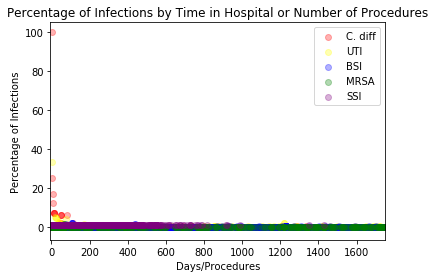

In [109]:
# Number of infections by days/procedures

#Change fig size
#plt.figure(figsize=(5,3))

plt.scatter(final_df['C.diff Patient Days'], final_df['% C. diff'], c = 'red', marker='o', alpha=0.3, label='C. diff')
plt.scatter(final_df['CAUTI: Number of Urinary Catheter Days'], final_df['% CAUTI'], c = 'yellow', marker='o', alpha=0.3, label='UTI')
plt.scatter(final_df['CLABSI: Number of Device Days'],  final_df['% CLABSI'], c = 'blue', marker='o', alpha=0.3, label='BSI')
plt.scatter(final_df['MRSA Patient Days'], final_df['% MRSA'], c = 'green', marker='o', alpha=0.3, label='MRSA')
plt.scatter(final_df['SSI: Colon, Number of Procedures'], final_df['% SSI'],  c = 'purple', marker='o', alpha=0.3, label = 'SSI')

#adding grid            
#plt.grid(True)



# x-axis labels, y-axis labels, title, legend
plt.xlim(-5,1750)
plt.title('Percentage of Infections by Time in Hospital or Number of Procedures')
plt.xlabel('Days/Procedures')
plt.ylabel('Percentage of Infections')
plt.legend(loc='best')
plt.savefig('percentage_infections_by_time_in_hospital.png')

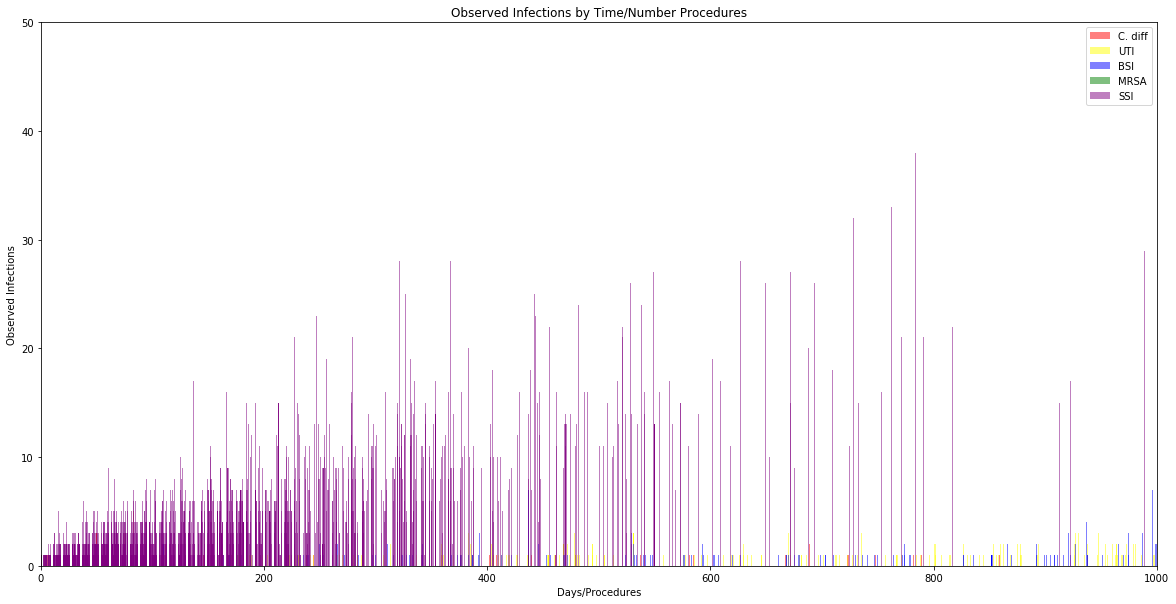

In [112]:
#bar chart of observed cases by time/#procedures
plt.figure(figsize=(20,10))
plt.bar(final_df['C.diff Patient Days'], final_df['C.diff Observed Cases'], color = 'red', alpha=0.5, label='C. diff')
plt.bar(final_df['CAUTI: Number of Urinary Catheter Days'], final_df['CAUTI: Observed Cases'], color = 'yellow', alpha=0.5, label='UTI')
plt.bar(final_df['CLABSI: Number of Device Days'], final_df['CLABSI: Observed Cases'], color = 'blue', alpha=0.5, label='BSI')
plt.bar(final_df['MRSA Patient Days'], final_df['MRSA Observed Cases'], color = 'green', alpha=0.5, label='MRSA')
plt.bar(final_df['SSI: Colon, Number of Procedures'], final_df['SSI: Colon Observed Cases'], color = 'purple', alpha=0.5, label = 'SSI')


#adding grid            
#plt.grid(True)

plt.xlim(0,1000)
plt.ylim(0,50)
plt.title('Observed Infections by Time/Number Procedures')
plt.xlabel('Days/Procedures')
plt.ylabel('Observed Infections')
plt.legend(loc='best')
plt.savefig('observed_infections_by_days-bar.png')